### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Lendo o dataset

In [2]:
fert = pd.read_csv('Fertilizer Prediction.csv')
fert.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


### Escolhendo Features e Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

soil_encoder = LabelEncoder()
fert['Soil Type'] = soil_encoder.fit_transform(fert['Soil Type'])

fert['Soil Type'].unique()

In [ ]:
crop_encoder = LabelEncoder()
fert['Crop Type'] = crop_encoder.fit_transform(fert['Crop Type'])

fert['Crop Type'].unique()

In [ ]:
fertilizer_encoder = LabelEncoder()
fert['Fertilizer Name'] = fertilizer_encoder.fit_transform(fert['Fertilizer Name'])

fert['Fertilizer Name'].unique()

In [ ]:
features = fert[['Temparature','Humidity ','Moisture','Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous']]
target = fert['Fertilizer Name']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fert.drop('Fertilizer Name',axis=1),fert['Fertilizer Name'],test_size=0.3,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

In [ ]:
acc = []
model = []

### Modelos de aloritmos de classificação

- KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN precisão: ", x)

print(classification_report(y_test,predicted_values))

In [ ]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation: ',score)

In [ ]:
# Precisão do treino
knn_train_accuracy = knn.score(x_train,y_train)
print("Precisão do treino:",knn.score(x_train,y_train))
# Precisão do teste
knn_test_accuracy = knn.score(x_test,y_test)
print("Precisão do teste:",knn.score(x_test,y_test))

In [ ]:
import pickle
pickle_out = open('classifier_fert.pkl','wb')
pickle.dump(knn,pickle_out)
pickle_out.close()

### Hiper-parâmetros para o KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

In [ ]:
g_res.best_params_

In [ ]:
g_res.best_score_

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree precisão: ", x*100)

print(classification_report(y_test,predicted_values))

In [ ]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

In [ ]:
#Treino
dt_train_accuracy = DT.score(x_train,y_train)
print("Precisão do treino:",DT.score(x_train,y_train))
#Teste
dt_test_accuracy = DT.score(x_test,y_test)
print("Precisão do teste:",DT.score(x_test,y_test))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest precisão: ", x)

print(classification_report(y_test,predicted_values))

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation: ',score)

In [ ]:
#Treino
rf_train_accuracy = RF.score(x_train,y_train)
print("Precisão do treino:",RF.score(x_train,y_train))
#Teste
rf_test_accuracy = RF.score(x_test,y_test)
print("Precisão do teste:",RF.score(x_test,y_test))

### GridSearchCV com Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV


grid_params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

gs = GridSearchCV(RandomForestClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)


In [ ]:
g_res.best_params_

In [ ]:
g_res.best_score_

### Navis Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes precisao: ", x)

print(classification_report(y_test,predicted_values))

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation: ',score)

In [ ]:
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Precisão do treino:",NaiveBayes.score(x_train,y_train))
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Precisão do teste:",NaiveBayes.score(x_test,y_test))

### XGBoost

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost precisão: ", x)

print(classification_report(y_test,predicted_values))

In [ ]:
score = cross_val_score(XB,features,target,cv=5)
print('Cross validation score: ',score)

In [ ]:
XB_train_accuracy = XB.score(x_train,y_train)
print("Precisão do treino:",XB.score(x_train,y_train))

XB_test_accuracy = XB.score(x_test,y_test)
print("Precisão do teste:",XB.score(x_test,y_test))

### Comparação entre os modelos

In [ ]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7))
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("Algoritmos")
plt.ylabel("Precisão")
plt.title("Teste vs Treino")
plt.legend()
plt.show()

Analisando os gráficos fica fácil de perceber que o Naive Bayes foi o que teve a melhor precisão <br>
Porém, quando um algoritmo atinge 100% de precisão, é necessário desconfiar <br>
Pois é incomum e pode significar algum erro ou falta de dados para comparação <br>

In [ ]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = fert['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = fert['Fertilizer Name'], ax=axes[1])

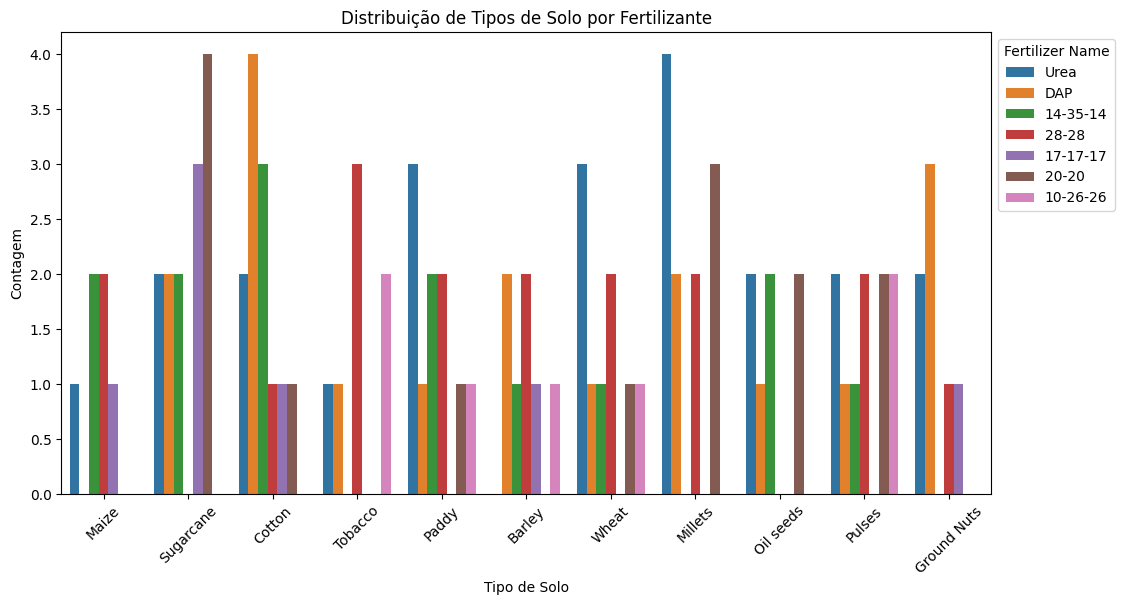

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=fert, x="Crop Type", hue="Fertilizer Name")
plt.title("Distribuição de Tipos de Solo por Fertilizante")
plt.xlabel("Tipo de Solo")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Fertilizer Name", bbox_to_anchor=(1, 1))
plt.show()

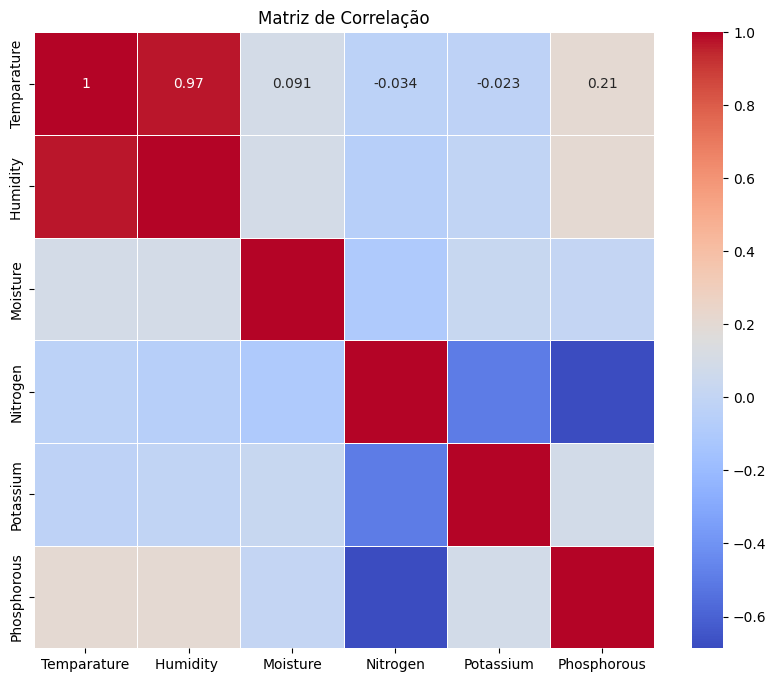

In [3]:
numeric_columns = fert.select_dtypes(include=['int64', 'float64'])

# Crie a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Crie um heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

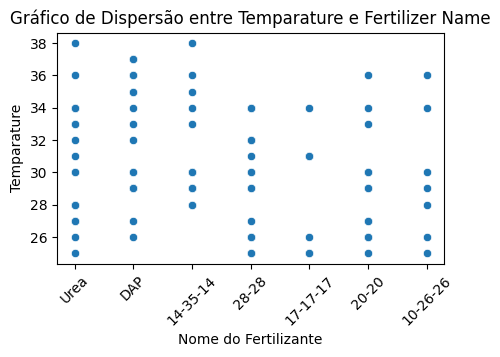

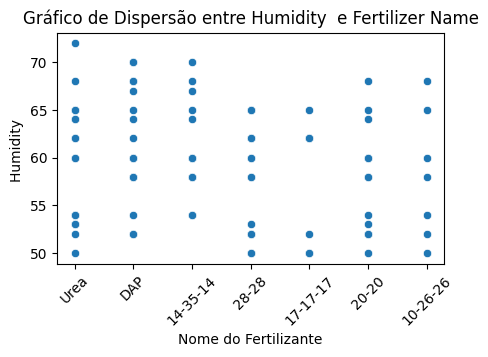

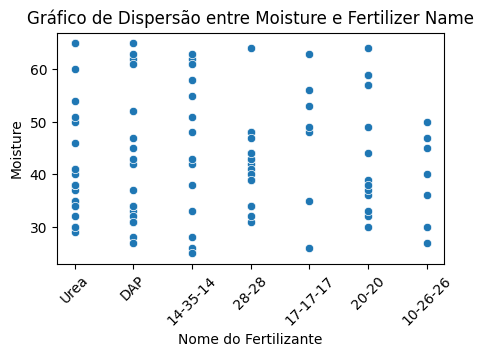

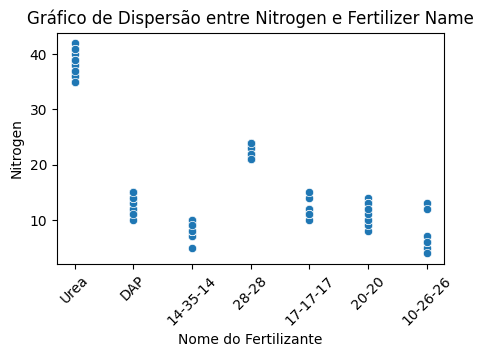

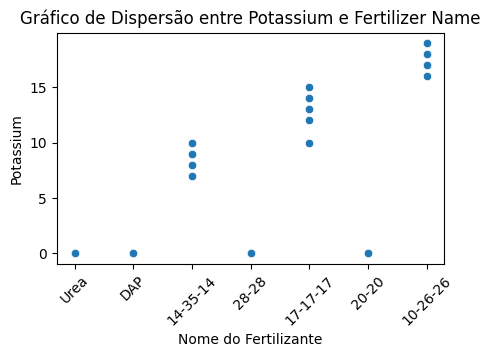

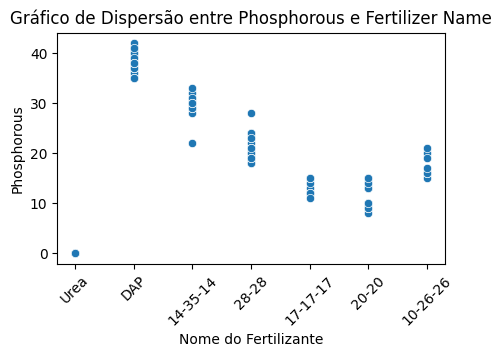

In [8]:
numeric_columns = fert.select_dtypes(include=['int64', 'float64'])

# Loop para criar gráficos de dispersão para cada variável numérica em relação ao "Fertilizer Name"
for numeric_variable in numeric_columns.columns:
    plt.figure(figsize=(5, 3))  # Ajuste o tamanho da figura conforme necessário
    sns.scatterplot(data=fert, x="Fertilizer Name", y=numeric_variable)
    plt.title(f"Gráfico de Dispersão entre {numeric_variable} e Fertilizer Name")
    plt.xlabel("Nome do Fertilizante")
    plt.ylabel(numeric_variable)
    plt.xticks(rotation=45)
    plt.show()